<a href="https://colab.research.google.com/github/vicabc/cosmology/blob/main/Defini%C3%A7%C3%A3o-parametros-cosmologicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DADOS

In [2]:
#Bibliotecas

from google.colab import files
import io
import pandas as pd
import seaborn as sns
import csv
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy import integrate

In [3]:
#Upload do arquivo
from google.colab import files
uploaded = files.upload()

Saving DL.csv to DL.csv


In [5]:
df = pd.read_csv('DL.csv', header=None)                #Leitura do arquivo #rapha: (mudei porque tava dando erro quando lia tudo junto.)
df.columns = ['Redshift', 'DL [Mpc]', 'Sigma_DL [Mpc]']    #Nomeia as colunas

O que se fez aqui foi transformar o arquivo enviado de .txt para .csv manualmente (via excel). Mas mesmo assim o arquivo ainda não estava separando por vírgulas as colunas, aí segue o código abaixo para que as colunas não encontrem nenhum tipo de erro para na hora que fomos plotar os dados.

In [6]:
df

,Redshift,DL [Mpc],Sigma_DL [Mpc]
0,1.4986,10851.1173,532.0162
1,1.6738,11736.7910,606.7476
2,1.0550,7167.7541,350.3223
3,1.1030,8226.9688,369.3736
4,1.5406,10396.2127,549.7847
...,...,...,...
175,1.8108,12254.0022,666.2087
176,1.5116,11219.9822,537.5037
177,0.6935,4566.3797,213.1093
178,0.1845,897.7660,47.3017


In [8]:
#Salvamos as colunas em variáveis sugestivas

red = df['Redshift']
d = df['DL [Mpc]']
sigma_dl = df['Sigma_DL [Mpc]']

#Exercício 1

Com o conjunto de dados fornecido, explorar o valor da função chi quadrado para obter os valores dos parâmetros H0 e Omega_m que melhor descrevem os dados. Para esta análise, assuma um modelo LCDM plano e desconsidere a componente de radiação. Preste atenção às quantidades que se encontram nos dados.

Temos que $\chi^2 = \sum_i^n (\frac{DL_{obs} - DL_{teo}}{\sigma_{DL}})^2$ 

Onde $D_L = (1+z_{i})\int_0^{z_i}\frac{dz}{H(z)}$ 

E $H(z) = H_0 \sqrt{\Omega_{m,0} (1+z)^3 + \Omega_\Lambda}$ e $\Omega_\Lambda = 1 - \Omega_{m,0}$

Portanto, $H(z) = H_0 \sqrt{\Omega_{m,0}(1+z)^3 + 1 - \Omega_{m,0}}$

Abaixo, criamos um código que, a partir de cada valor de redshift, calcula um valor de $DL_{teo}$ para cada valor de $H_0$ (que varia entre 50 e 100 de 1 em 1 passo) e $\Omega_{m,0}$ (que varia entre 0 e 0.7 de 0.005 passos) 

In [9]:
rows = []
for o in range(0,705,5):           #loop de ohmega_m -> de 0 a 0.7 variando de 0.005
  for hz in range(50, 101, 1):     #loop de H_0 -> variando de 50 a 100 em passos de 1 
    chi=0.0
    chiquadrado=0.0
    for z, dl, sigma in zip(red, d, sigma_dl):
      omegam = 0.001*o
      funcao=lambda x: 300000*((omegam*((1+x)**3)+1-omegam)**(-1/2)) #definição da função para integrar
      integral, err = integrate.quad(funcao, 0, z)                   #cálculo da integral (O , err separa o erro da integral.)
      dlt = ((1+z)*integral)/hz
      chi= (((dl-dlt)/(sigma))**2)                                   #cálculo de todos os chis de cada cada DL teórico
      chiquadrado=chiquadrado+chi
    rows.append([chiquadrado, omegam, hz])                           #salvando em um dataframe
    dframe = pd.DataFrame(rows, columns=["Chi quadrado", "Omega_m", "H_0"])


In [10]:
dframe

,Chi quadrado,Omega_m,H_0
0,56765.168366,0.0,50
1,52338.343752,0.0,51
2,48259.265054,0.0,52
3,44498.391861,0.0,53
4,41029.088544,0.0,54
...,...,...,...
7186,10302.097626,0.7,96
7187,10644.450003,0.7,97
7188,10985.530807,0.7,98
7189,11325.207129,0.7,99


In [11]:
#Chi quadrado mínimo:
min = dframe['Chi quadrado'].idxmin()
dframe.iloc[min]

Chi quadrado    378.024754
Omega_m           0.405000
H_0              67.000000
Name: 4148, dtype: float64

Concluimos que o modelo que melhor descreve as observações possui parâmetros $H_0=67 km/s/Mpc$ e $\Omega_{m,0}=0.405$

#Exercício 2

Faça um gráfico de dispersão dos dados (incluindo o erro) e adicione uma linha que represente o modelo de melhor ajuste.

Primeiro vamos calcular a função $D_L(z)$ cujos parâmetros são $H_0=67 km/s/Mpc$ e $\Omega_{m,0}=0.405$, ou seja $D_L = (1+z_{i})\int_0^{z_i}\frac{dz}{67\sqrt{0.405*(1+z)^3 + 0.595}}$ 

In [12]:
rows=[]
for z, dl in zip(red, d):
  funcao1=lambda y: 300000/(0.405*((1+y)**3)+(1-0.405))**(1/2)
  integral1, err = integrate.quad(funcao1, 0, z)
  dl1 = ((1+z)*integral1)/67
  rows.append([dl1,z]) 
  dframe1 = pd.DataFrame(rows, columns=["dl", "z"])

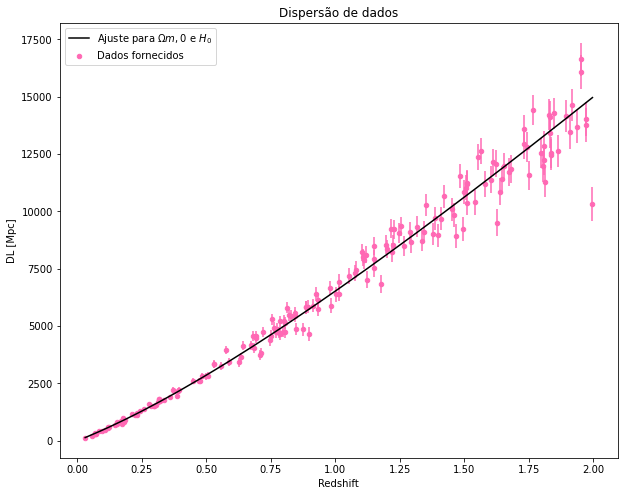

In [13]:
data = df.plot(x='Redshift', y="DL [Mpc]", yerr='Sigma_DL [Mpc]',kind="scatter", color='hotpink', figsize=(10, 8), title='Dispersão de dados')
model = sns.lineplot(data=dframe1,x='z',y='dl' ,color='black', legend=True)
plt.legend(labels=['Ajuste para $\Omega{m,0}$ e $H_0$', 'Dados fornecidos'])

Os pontos em rosa correspondem os dados observacionáis de distância de luminosidade x redshift. A linha preta representa o ajuste que contém os parâmetros $H_0=67 km/s/Mpc$ e $\Omega_{m,0}=0.405$. Podemos ver que, de fato, o modelo cosmológico encontrado corresponde aos dados fornecidos.

#Exercício 3

Faça um grafico do plano $H_0$-$\Omega_m$ com os valores de $\chi^2$ que representam o 68% de confiança e com outra cor os pontos que representam o 95% de confiança (probabilidade). Para isto utilize os valores de $\chi^2$ limites dados em aula.

In [15]:
dh0=dframe['H_0']
domm=dframe['Omega_m']
dchisq=dframe['Chi quadrado']

sigma1=[]
sigma2=[]

e68=2.3 #Margem de erro de 68%
e95=6.17 #Margem de erro de 95%


min = dframe['Chi quadrado'].min()
range68 = min + e68
range95 = min + e95
print('Intervalo de chi para erro de 68%:', min,'até',range68)
print('Intervalo de chi para erro de 95%:', min,'até', range95)

Intervalo de chi para erro de 68%: 378.02475371090867 até 380.3247537109087
Intervalo de chi para erro de 95%: 378.02475371090867 até 384.1947537109087


In [16]:
compchiq = len(dchisq)
listachiq1=[]
rows1=[]

#aqui buscamos rodar dentro de todos os índices de qui quadrados

for i in range(compchiq):
  chiq1=dchisq[i]
  rows1.append(chiq1) #salvando em um dataframe
  dframe3 = pd.DataFrame(rows1)
w=dframe3[0]
sigma1=[]
sigma2=[]

#de maneira que estudaremos se esses mesmos obedecem as condições de probabilidade

for j in w:
  if j <= range68:
    sigma1.append(j)
for k in w:
  if k <= range95:
    sigma2.append(k)

 #foi separado, para cada um dos valores que obedece ou sigma1 ou sigma2, dataframes contendo os dados   

dfsigma1= pd.DataFrame (sigma1)
dfsigma2 = pd.DataFrame(sigma2)
dffs = pd.concat([dfsigma1, dfsigma2], axis=1, ignore_index=True)
dffs.rename(columns={0: 'Sigma 1', 1: 'Sigma 2'}, inplace = True)

#visualizamos os pontos gerados
dffs

,Sigma 1,Sigma 2
0,379.333095,383.069283
1,378.250882,381.308358
2,378.024754,380.508956
3,378.627419,380.638600
4,380.032609,384.180345
5,NaN,381.666106
6,NaN,381.299754
7,NaN,383.561517
8,NaN,379.333095
9,NaN,378.250882


Agora definimos os índices dos $\chi^2$ que obedecem as condições de propabilidade para podermos relacionar com os seus respectivos $\Omega_m$ e $H_0$ do dataset inicial.

In [17]:
listachiq2=[]
rows2=[]
#criamos esse contador para eventualmente descobrir o par (h0,omega m) no data frame inicial, para cada índice dos chis que descobrimos 
count=0
listacontador=[]

#o primeiro for está rodando dentro do comprimento da coluna que existe todos os chis, sem filtro algum
#geramos também um dataframe que contenha os chis filtrados e logo menos iremos fundí-lo com o dataframe dos contadores

for i in range(len(dchisq)):
  target=dchisq[i]
  count=count+1
  if target <= range68:
    rows2.append(target)
    dframe4=pd.DataFrame(rows2)
    listacontador.append(count) 
  elif target <= range95:
    rows2.append(target)
    dframe4=pd.DataFrame(rows2) 
    listacontador.append(count)

In [18]:


dframe5=pd.DataFrame(listacontador)
dffs= pd.concat([dframe4, dframe5], axis=1, ignore_index=True)

dframe50=dframe5[0]
listah0=[]
listaomm=[]
for i in range(len(dframe5)):
  index=dframe50[i]
  #aqui é possível achar os parâmetros relacionados aos chis filtrados
  listah0.append(dh0[index])
  listaomm.append(domm[index])

dframe6=pd.DataFrame(listah0)
dframe7=pd.DataFrame(listaomm)

#concatenamos novamente os dataframes agora gerando um geral que contenha todas as informações necessárias para gerar um scatter 

dffs1= pd.concat([dframe6, dframe7], axis=1, ignore_index=True)
dffs2= pd.concat([dffs1, dffs], axis=1, ignore_index=True)
dffs2.rename(columns={0: 'H_0', 1: 'Omega_m0', 2:'Chi quadrado', 3:'Índices'}, inplace = True)
dffs2

,H_0,Omega_m0,Chi quadrado,Índices
0,69,0.365,383.069283,3742
1,69,0.370,381.308358,3793
2,69,0.375,380.508956,3844
3,69,0.380,380.638600,3895
4,68,0.385,384.180345,3945
5,69,0.385,381.666106,3946
6,68,0.390,381.299754,3996
7,69,0.390,383.561517,3997
8,68,0.395,379.333095,4047
9,68,0.400,378.250882,4098


Buscamos entender como a expansão do universo dada por H0 e a composição do mesmo, através da matéria (e também da energia escura), se correlaciona. Utilizamos a covariância, afim de comparar, estatisticamente, as duas variáveis em questão, permitindo entender como elas se relacionam entre si.

Para isto, sabendo que uma elipse de erro representa um iso-contorno da distribuição gaussiana e ajuda a  visualizar um intervalo de confiança 2D. Montaremos a seguir um gráfico que mostra um intervalo de 68% (1${\sigma}$) e 95% (2${\sigma}$) para um conjunto de dados normalmente distribuídos.

Text(0.5, 1.0, 'Intervalo de confiança do modelo cosmológico encontrado')

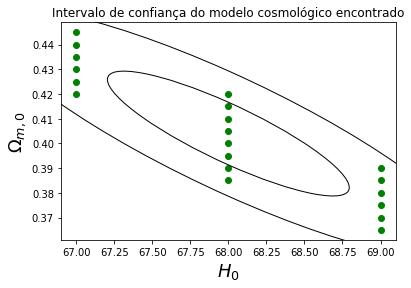

In [19]:
#Salvamos as colunas de h0, omega m em variáveis
h0l = dffs2['H_0']
oml = dffs2['Omega_m0']


#Definimos uma função que retorna os autovalores e autovetores de uma matriz Hermitiana complexa (conjugada simétrica) ou uma matriz simétrica real.
#essa matriz, posteriormente, mostramos ser composta exatamente dos pontos covariantes

def eigsorted(cov):                     
    lambda_, v = np.linalg.eigh(cov)
    order = lambda_.argsort()[::-1]
    return lambda_[order], v[:,order]


#salvamos os pontos, derivados do dataframe gerado por último, em 2 listas

listax = []
listay= []
for n, h in zip(h0l, oml):
  listax.append(n)
  listay.append(h)

#Função de covariância dos pontos
cov = np.cov(listax, listay)
lambda_, v = np.linalg.eig(cov) #aplica as listas covariadas para gerarem autovalores e autovetores
lambda_ = np.sqrt(lambda_)


#Geramos a elipse
ax = plt.subplot()                                                    #Necessário para plotar os 2 gráficos juntos
for j in range(1, 3):
  ell = Ellipse(xy=(np.mean(listax), np.mean(listay)),                #Eixos da elipse
                width=lambda_[0]*j*2, height=lambda_[1]*j*2.5,        #Ajuste do tamanho da elipse
                angle=np.rad2deg(np.arcsin(v[1, 0])), color='black')  #Ajuste da angulatura da elipse
  ell.set_facecolor('none')
  ax.add_artist(ell)

#Fazemos a visualização dos dados espalhando os pontos covariantes 

plt.scatter(listax, listay, color="green")
plt.xlabel("$H_0$", fontsize=18)
plt.ylabel("$\Omega_{m,0}$", fontsize=18)
plt.title("Intervalo de confiança do modelo cosmológico encontrado")

Os dados em verde representam os pontos dos pares de $\Omega_{m,0}$ e $H_0$ e as elipses, mostram os intervalos de confiança que estudamos. Vemos que os pontos que mais chegam perto do melhor ponto que representa o modelo cosmológico, encontramos dentro da elipse menor, que por sua vez representa uma probabilidade menor porém mais refinada em certeza de que a resposta está dentro de sua área.

Ratificamos que os pontos dentro da elipse maior possuem 95% de confiança, enquanto os que se encontram dentro da elipse menor, 68%.

Referências:

1. 
http://www.cs.utah.edu/~tch/CS6640F2020/resources/How%20to%20draw%20a%20covariance%20error%20ellipse.pdf

2. https://stackoverflow.com/questions/20126061/creating-a-confidence-ellipses-in-a-sccatterplot-using-matplotlib

3. https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html

